In [1]:
from time import time
import os
import sys
sys.path.append('../')

from utils.codification_cnn import CNNLayer, NNLayer, ChromosomeCNN, FitnessCNN, FitnessCNNParallel
from utils.datamanager import DataManager
from utils.lr_finder import LRFinder
from time import time
import numpy as np


Using TensorFlow backend.


In [2]:
fitness_cnn = FitnessCNN()

# dataset params:
data_folder = '../../../../../../datasets/MNIST_variations'
classes = []

# Fitness params
epochs = 75
batch_size = 128
verbose = 1
redu_plat = False
early_stop = 0
warm_up_epochs= 1
base_lr = 0.001
smooth = 0.1
cosine_dec = True
lr_find = True 

dataset = 'MRDBI'
dm = DataManager(dataset, clases=classes, folder_var_mnist=data_folder)
data = dm.load_data()
print(data[0][0].shape)

(9600, 28, 28, 1) train samples
(2400, 28, 28, 1) validation samples
(50000, 28, 28, 1) test samples
(9600, 28, 28, 1)


In [3]:
fitness_cnn.set_params(data=data, verbose=verbose, batch_size=batch_size, reduce_plateau=redu_plat,
                   epochs=epochs, cosine_decay=cosine_dec, early_stop=early_stop, 
                   warm_epochs=warm_up_epochs, base_lr=base_lr, smooth_label=smooth, find_lr=lr_find)

fitness_folder = '../../delete'
fitness_file = '../../delete/fitness_example' 
fitness_cnn.save(fitness_file)

fitness = FitnessCNNParallel()

In [ ]:
l1_2 = CNNLayer(86, (3,5), 'leakyreLu', 0.262, 1)
l2_2 = CNNLayer(84, (5,3), 'leakyreLu', 0.319, 1)
l3_2 = CNNLayer(243, (1,3), 'prelu', 0.322, 1)
l4_2 = NNLayer(948, 'sigmoid', 0.467)
l5_2 = NNLayer(780, 'sigmoid', 0.441)
best_mrdbi_v2 = ChromosomeCNN([l1_2, l2_2, l3_2], [l4_2, l5_2], fitness)

In [ ]:
FPS = {16:'FP16 + BN16', 32:'FP32 + BN32', 160:'FP16', 320:'FP32', 3216:'FP32 + BN16'}
fp = 16

fitness_cnn.save(fitness_file)
fitness.set_params(chrom_files_folder=fitness_folder, fitness_file=fitness_file, max_gpus=1,
           fp=fp, main_line='python /home/daniel/proyectos/Tesis/project/GA/NeuroEvolution/train_gen.py')

ti = time()
print("Evaluationg Second model with FP%d, cosine_decay %s" %(fp, str(cos)) )
score = fitness.calc(best_mrdbi_v2, test=True)
print("Score: %0.3f" % score)
print("Elapsed time: %0.3f " % (time() - ti))



Evaluationg Second model with FP16
Training... _________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 86)        1376      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 86)        0         
_________________________________________________________________
batch_normalization_f16_1 (B (None, 28, 28, 86)        344       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 86)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 86)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            

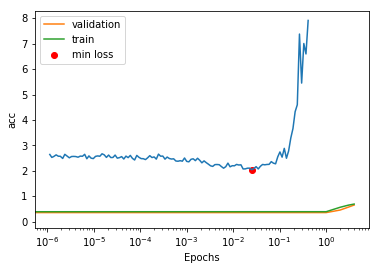

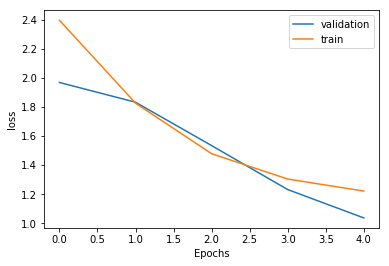

0.3412 in 1.2 min

Score: 0.341
Elapsed time: 71.064 


In [5]:
l1_2 = CNNLayer(86, (3,5), 'leakyreLu', 0.262, 1)
l2_2 = CNNLayer(84, (5,3), 'leakyreLu', 0.319, 1)
l3_2 = CNNLayer(243, (1,3), 'prelu', 0.322, 1)
l4_2 = NNLayer(948, 'sigmoid', 0.467)
l5_2 = NNLayer(780, 'sigmoid', 0.441)
best_mrdbi_v2 = ChromosomeCNN([l1_2, l2_2, l3_2], [l4_2, l5_2], fitness_cnn)

FPS = {16:'FP16 + BN16', 32:'FP32 + BN32', 160:'FP16', 320:'FP32', 3216:'FP32 + BN16'}
fp = 16

ti = time()
print("Evaluationg Second model with FP%d" % fp )
score = fitness_cnn.calc(best_mrdbi_v2, fp=fp)
print("Score: %0.3f" % score)
print("Elapsed time: %0.3f " % (time() - ti))

Evaluationg Second model with FP16
Training... _________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 86)        1376      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 86)        0         
_________________________________________________________________
batch_normalization_f16_1 (B (None, 28, 28, 86)        344       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 86)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 86)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            

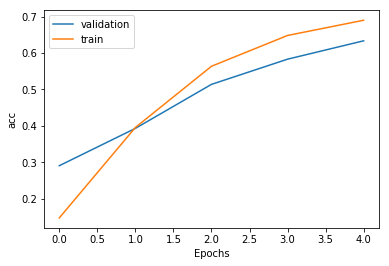

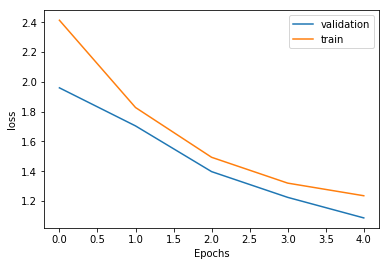

0.3667 in 0.9 min

Score: 0.367
Elapsed time: 54.777 


In [6]:
fitness_cnn.find_lr = False
ti = time()
print("Evaluationg Second model with FP%d" % fp )
score = fitness_cnn.calc(best_mrdbi_v2, fp=fp)
print("Score: %0.3f" % score)
print("Elapsed time: %0.3f " % (time() - ti))